# **Python/ML workshop**
## **Organized by IET MPSTME**

## **Instructor**: Radhika Chapaneri

## Dec 2020

# **File Formats**
* Standard way in which data is collected and stored
* Most commonly used format for storing data is the
spreadsheet format where data is stored in rows
and columns
* Each row is called a record
* Each column in a spreadsheet holds data
belonging to same data type
* Commonly used spreadsheet formats are comma
separated values and excel sheets 
* Other formats include plain text, json, html,
mp 3 ,mp 4 etc

# **Pandas**
* Open source Python library providing high
performance data manipulation and analysis
tool using its powerful data structures

* Name pandas is derived from the word
Panel Data - term for
multidimensional data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### **Dataframes**
- According to Pandas documentation: *Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). Arithmetic operations align on both row and column labels.*


- In human terms, this means that a **dataframe has rows and columns**, can **change size**, and possibly **has mixed data types**.

### **Peek at the DataFrame contents**
df.info()                  # index & data types

df.head(i)                 # get first i rows

df.tail(i)                 # get last i rows

df.describe()              # summary stats cols

### Importing Data

In [ ]:
cars_data =  pd.read_csv('Toyota.csv')

In [ ]:
# Output object type
type(cars_data)

# Understanding and cleaning data

### Viewing Data

* The head() function simply shows the first 5 rows of our Data Frame.  
* We have a 2-Dimensional object where each row is an independent observation of our car data.

In [12]:
# We can view our Data Frame by calling the head() function
cars_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170


In [13]:
# Output entire Data Frame
cars_data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


* To get the column labels of the dataframe.

In [14]:
cars_data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

* To get the total number of elements from the
dataframe

In [15]:
cars_data.size

14360

* To get the dimensionality of the dataframe






In [16]:
cars_data.shape

(1436, 10)

* To access a scalar value, the fastest way
is to use the at and iat methods
* at provides label based scalar lookups
* iat provides integer based lookups

In [10]:
cars_data.size

14360

In [11]:
cars_data.shape

(1436, 10)

* To access a group of rows and columns by
label(s) loc() can be used




In [8]:
cars_data.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [17]:
# Select all rows for multiple columns 'KM', , 'HP', 'Automatic', 
cars_data.loc[:,["KM", "HP", "Automatic"]]

,KM,HP,Automatic
0,46986,90,0
1,72937,90,0
2,41711,90,0
3,48000,90,0
4,38500,90,0
...,...,...,...
1431,20544,86,0
1432,??,86,0
1433,17016,86,0
1434,??,86,0


* iloc() is integer based slicing, whereas .loc() used labels/column names. 

In [19]:
cars_data.iloc[1:5, 2:4]

,KM,FuelType
1,72937,Diesel
2,41711,Diesel
3,48000,Diesel
4,38500,Diesel


* dtypes returns a series with the data type of
each column

In [20]:
cars_data.dtypes

Price          int64
Age          float64
KM            object
FuelType      object
HP            object
MetColor     float64
Automatic      int64
CC             int64
Doors         object
Weight         int64
dtype: object

* info() returns a concise summary of a
dataframe

In [21]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1436 non-null   object 
 3   FuelType   1336 non-null   object 
 4   HP         1436 non-null   object 
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 112.3+ KB


Observations:
* ‘KM’ has been read as object instead of integer
* ‘HP’ has been read as object instead of integer
* MetColor ’ and ‘Automatic have been read as
float 64 and int 64 respectively since it has values 0/1
* Ideally, ‘Doors’ should have been read as int64 since it
has values 2, 3, 4, 5. But it has been read as object
* Missing values present in few variables
* Let’s encounter the reason !

* unique() is used to find the unique
elements of a column

In [24]:
print(np.unique(cars_data['KM']))
print(np.unique(cars_data['HP']))
print(np.unique(cars_data['Doors']))

['1' '10000' '100123' ... '99865' '99971' '??']
['107' '110' '116' '192' '69' '71' '72' '73' '86' '90' '97' '98' '????']
['2' '3' '4' '5' 'five' 'four' 'three']


In [25]:
#cars_data = pd.read_csv(url,na_values=["??", "????"])
cars_data = pd.read_csv('Toyota.csv',na_values=["??", "????"])

In [29]:
cars_data

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


In [27]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 112.3+ KB


In [28]:
cars_data['Doors'].replace('three',3, inplace=True)
cars_data['Doors'].replace('four',4,inplace=True)
cars_data['Doors'].replace('five',5,inplace=True)

In [32]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   object 
 6   Automatic  1436 non-null   object 
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 112.3+ KB


In [31]:
cars_data['Doors'] = cars_data['Doors'].astype('int64')
cars_data['MetColor'] = cars_data['MetColor'].astype('object')
cars_data['Automatic'] = cars_data['Automatic'].astype('object')

In [33]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   object 
 6   Automatic  1436 non-null   object 
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 112.3+ KB


In [34]:
cars_data.isnull().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [37]:
cars_data['FuelType'].value_counts()

Petrol    968
Diesel    116
CNG        12
Name: FuelType, dtype: int64

In [35]:
# dropping null values
cars_data = cars_data.dropna()

In [36]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1096 non-null   int64  
 1   Age        1096 non-null   float64
 2   KM         1096 non-null   float64
 3   FuelType   1096 non-null   object 
 4   HP         1096 non-null   float64
 5   MetColor   1096 non-null   object 
 6   Automatic  1096 non-null   object 
 7   CC         1096 non-null   int64  
 8   Doors      1096 non-null   int64  
 9   Weight     1096 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 94.2+ KB


In [38]:
cars_data[cars_data.FuelType == 'Diesel'].KM.mean()

118046.54310344828

# Visualization begins...

In [39]:
cars_data.describe()

,Price,Age,KM,HP,CC,Doors,Weight
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,10735.937044,55.661496,69268.826642,101.806569,1568.863139,4.062044,1073.416971
std,3636.716945,18.699777,38070.667467,15.034116,184.386960,0.956488,51.812821
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,1000.000000
25%,8450.000000,43.000000,43590.500000,90.000000,1400.000000,3.000000,1045.000000
50%,9900.000000,60.000000,63393.500000,110.000000,1600.000000,4.000000,1070.000000
75%,11950.000000,70.000000,88031.750000,110.000000,1600.000000,5.000000,1090.000000
max,31275.000000,80.000000,243000.000000,192.000000,2000.000000,5.000000,1615.000000


**Q. Plot the histogram of kilometer - Number of bins =20**

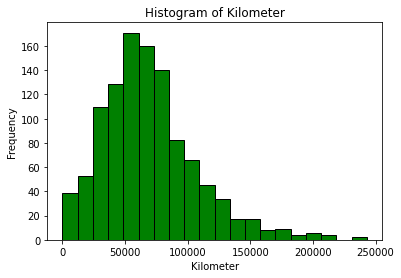

In [40]:
plt.hist(cars_data['KM'], bins=20, color = 'green', edgecolor ='black') 
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

Frequency distribution of kilometre of the cars shows that most of the cars have travelled between 50000-100000 km and there are only few cars with more distance travelled

**Q. Plot the bar plot of Fuel Types**

In [43]:
counts = list(cars_data['FuelType'].value_counts())
print(counts)
index = np.arange(len(counts))
print(index)
fueltype=('Petrol','Diesel','CNG')

[968, 116, 12]
[0 1 2]


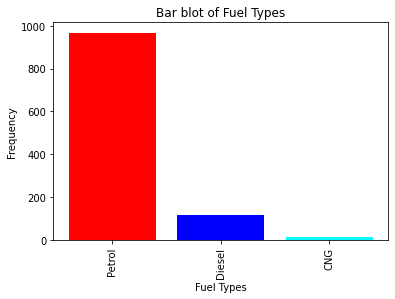

In [44]:
plt.bar(index, counts, color = ['red','blue','cyan'])
plt.title('Bar blot of Fuel Types')
plt.xlabel('Fuel Types')
plt.ylabel('Frequency')
plt.xticks(index,fueltype,rotation =90)
plt.show()

Bar plot of fuel type shows that most of the cars have petrol as fuel type

**Q. Plot Scatter plot of Age Vs Price**

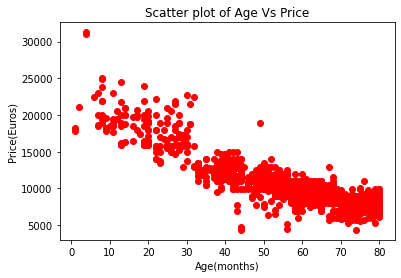

In [46]:
plt.scatter(cars_data['Age'], cars_data['Price'], c='red')
plt.title('Scatter plot of Age Vs Price')
plt.xlabel('Age(months)')
plt.ylabel('Price(Euros)')
plt.show()

The price of the car decreases as age of the car increases

**Q. Plot the boxplot for the attribute 'Age'**

In [ ]:
plt.boxplot(None, 
            notch=False, # box instead of notch shape 
            sym='rs',    # red squares for outliers
            vert=True,   # vertical box aligmnent
            labels = ['Age'])

plt.xlabel('Data')
plt.title('Box plot')

In [ ]:
import matplotlib.pyplot as plt
data=[25, 28, 29, 29, 30, 34, 35, 35, 37, 38]
data1=[2,43,49,50,51,51, 53,54,60,62,63]
plt.None
plt.xlabel('Data')
plt.title('Box plot')
plt.show()

A very powerful feature in Pandas is **groupby**. 

- This function allows us to **group together rows that have the same value in a particular column**. 
- Then, we can aggregate this group-by object to compute statistics in each group. 

In [ ]:
cars_data.None

In [ ]:
cars_data.None

In [ ]:
cars_data.None